In [2]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

In [3]:
df = pd.read_csv('DS1_C6_S2_EmployeeAttrition_Data_Concept.csv')

In [4]:
df['Over18'].unique()

array(['Y', nan], dtype=object)

In [5]:
df.shape

(1470, 27)

In [6]:
df.isnull().sum()

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 30:      # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  -----------------
Attrition                 Age
BusinessTravel            EmployeeNumber
Department                HourlyRate
DistanceFromHome          MonthlyIncome
EducationField            TotalWorkingYears
EnvironmentSatisfaction   YearsAtCompany
Gender
JobInvolvement
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TrainingTimesLastYear
WorkLifeBalance
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [9]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
      

In [10]:
info_of_cat('Attrition')

Unique values in Attrition are: ['Yes' 'No']
Mode of Attrition is No
Number of missing values in Attrition is 0


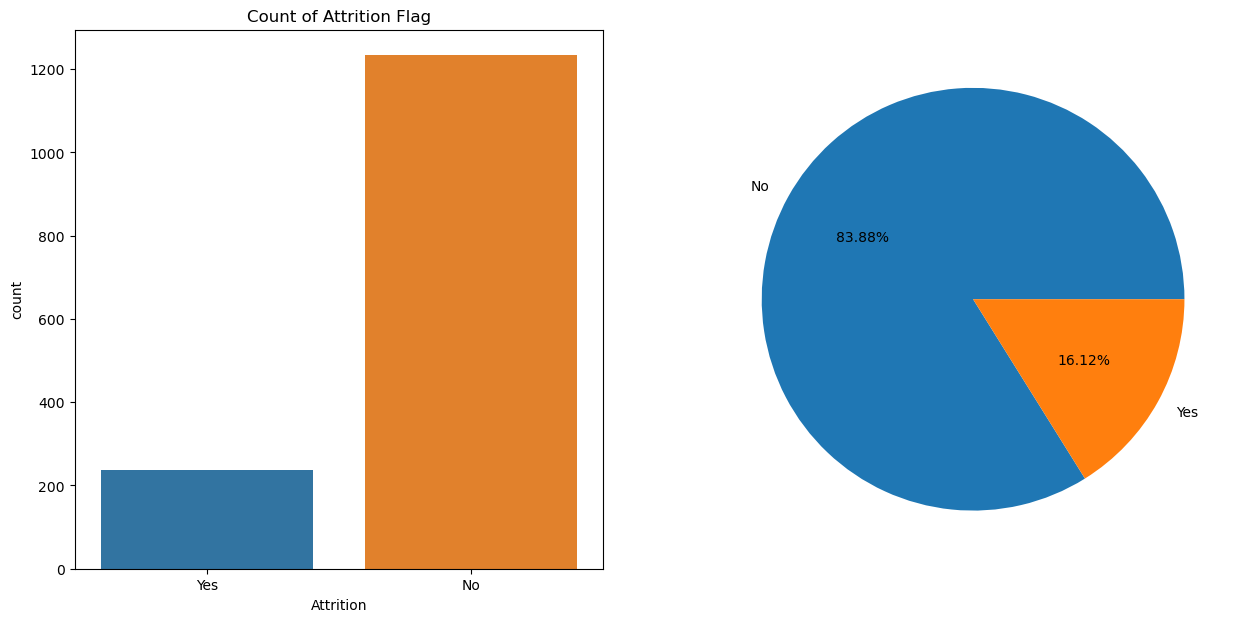

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Attrition Flag")                  # Set the title of the graph
percentage = df["Attrition"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Attrition"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Attrition"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# ***Interpretation: The dataset indicates that 16% of the customers left the bank while 84% of the Employee are still with it.

In [12]:
info_of_cat('Age')

Unique values in Age are: [41. 49. 37. 33. 27. 32. 59. 30. 38. 36. 35. 29. 31. 34. 28. 22. 53. 24.
 21. nan 42. 44. 46. 39. 43. 50. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60.]
Mode of Age is 34.0
Number of missing values in Age is 24


In [13]:
Age_mode = df.Age.mode()[0]
print(Age_mode)
df["Age"].fillna(Age_mode, inplace = True)

34.0


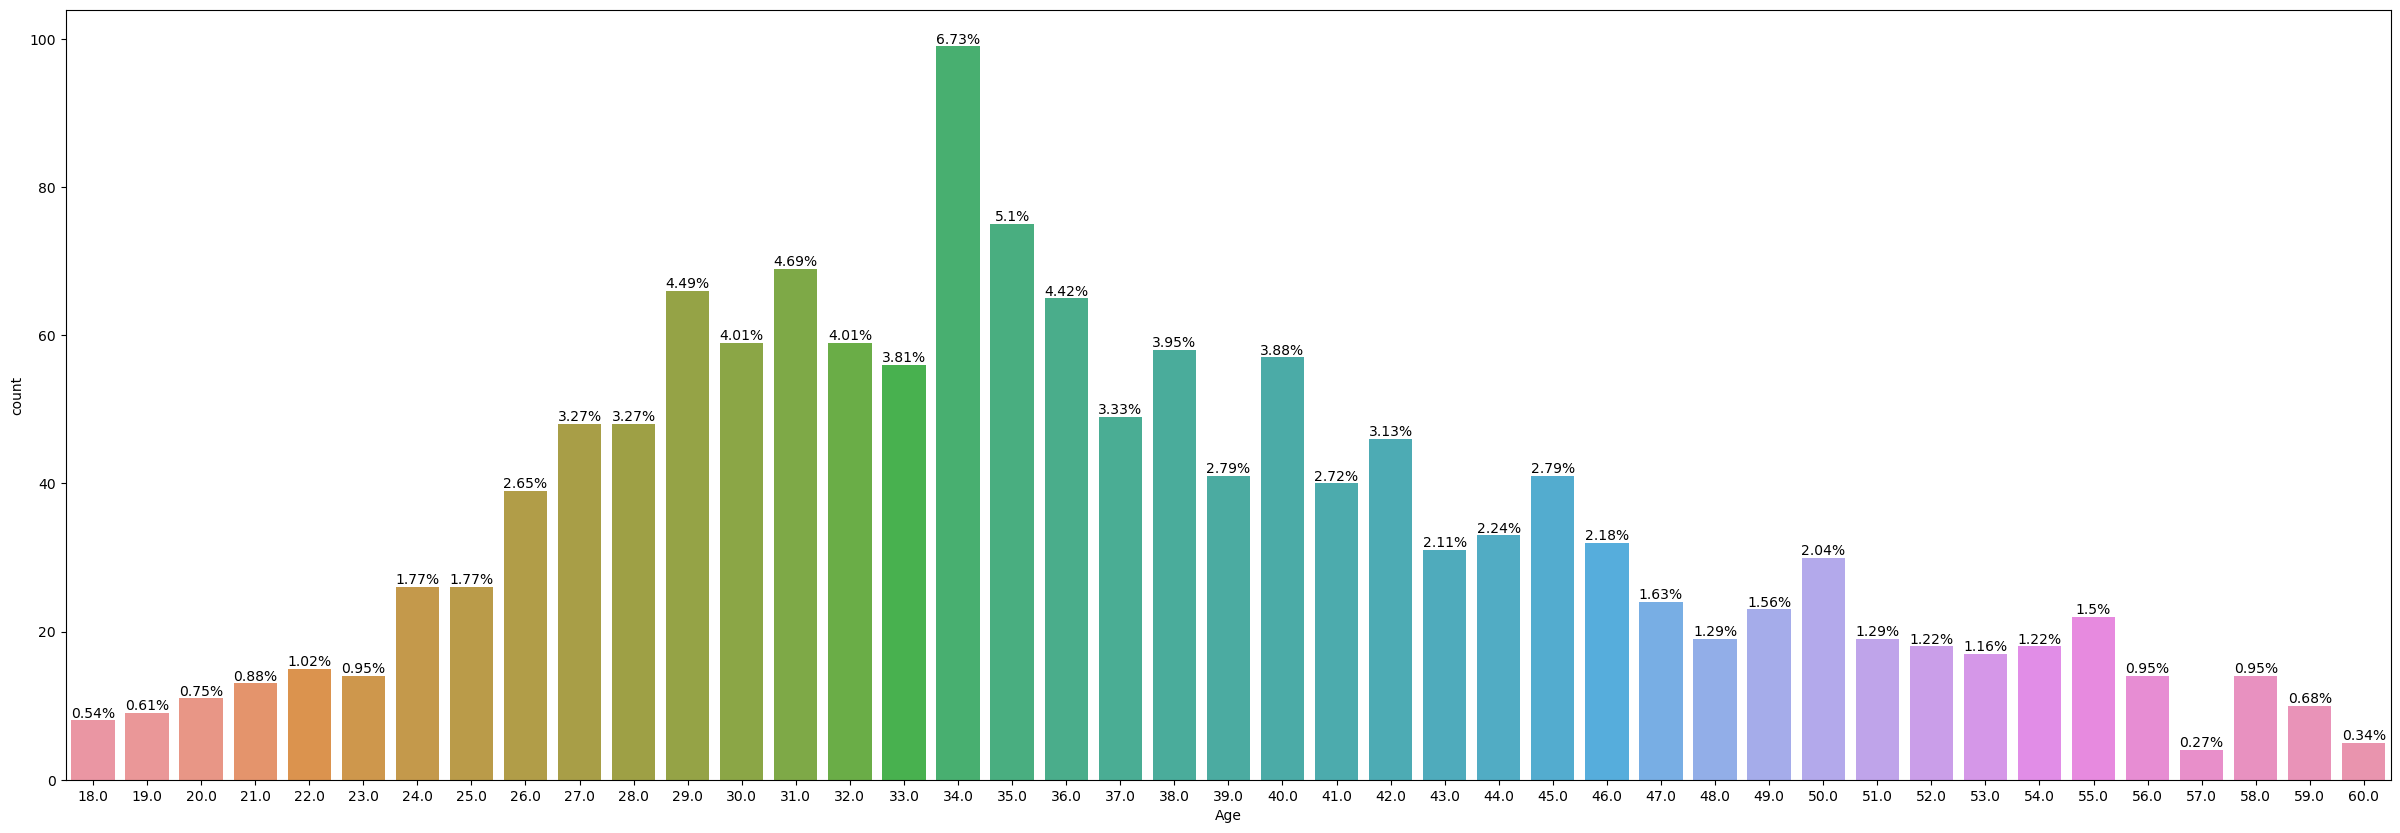

In [14]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Age"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height()*100 /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width()/2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
    fig.set_figheight(10)                                                             # annotate: used to annotate over objects, here objects are the bars
    fig.set_figwidth(30)
plt.show()

In [15]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2


In [16]:
gmode = df.BusinessTravel.mode()[0]
print(gmode)
df["BusinessTravel"].fillna(gmode,inplace=True)

Travel_Rarely


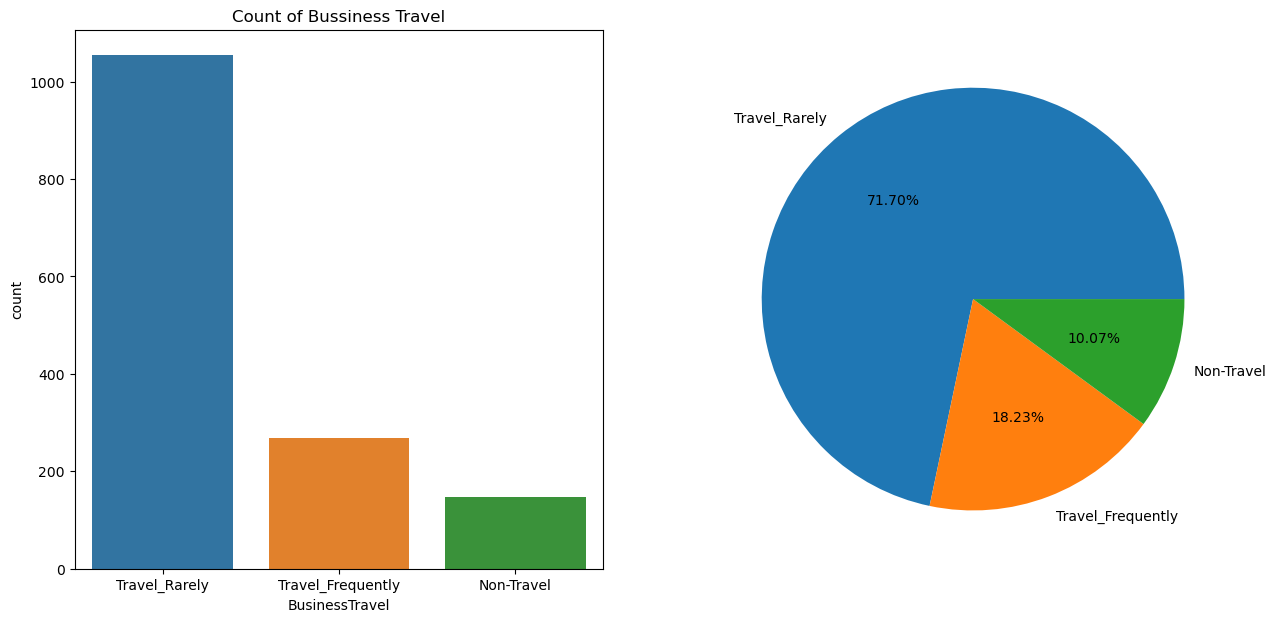

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Bussiness Travel")                  # Set the title of the graph
percentage = df["BusinessTravel"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["BusinessTravel"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["BusinessTravel"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

# **Interpritation : Mejority of Bussiness Traveler are Travels Rarely

In [18]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2


In [19]:
info_of_cat('Department')

Unique values in Department are: ['Sales' 'Research & Development' 'Human Resources' nan]
Mode of Department is Research & Development
Number of missing values in Department is 4


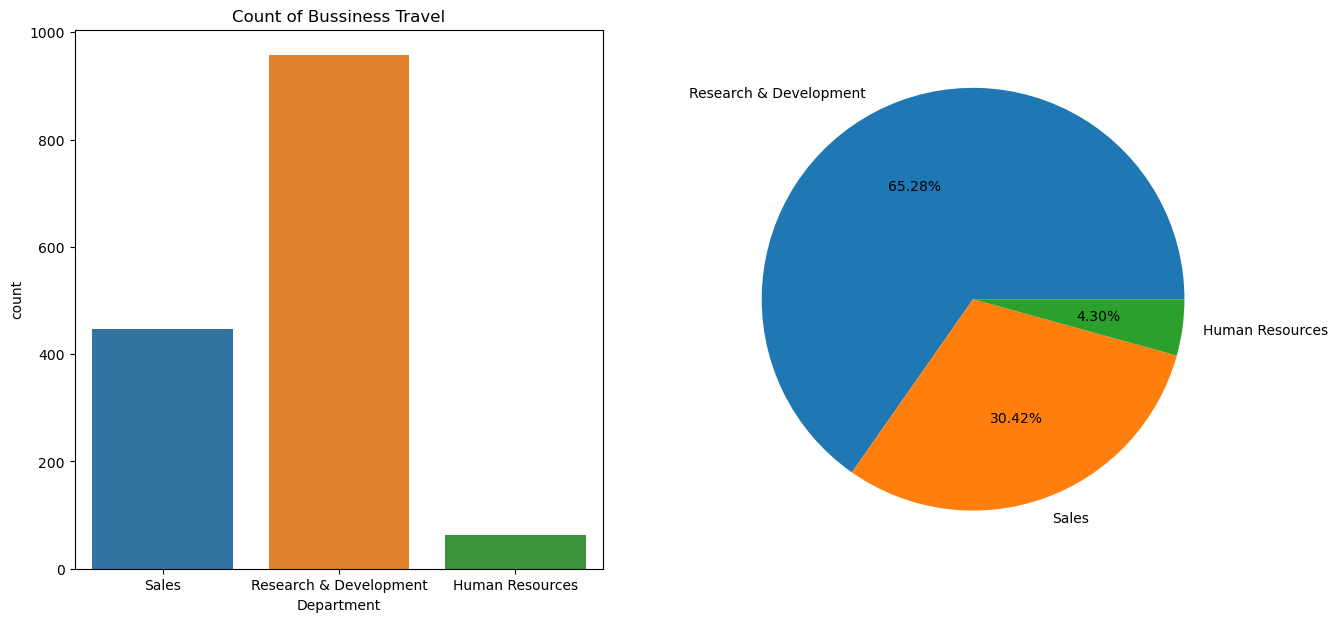

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Bussiness Travel")                  # Set the title of the graph
percentage = df["Department"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Department"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Department"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [21]:
info_of_cat('DistanceFromHome')

Unique values in DistanceFromHome are: [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Mode of DistanceFromHome is 2
Number of missing values in DistanceFromHome is 0


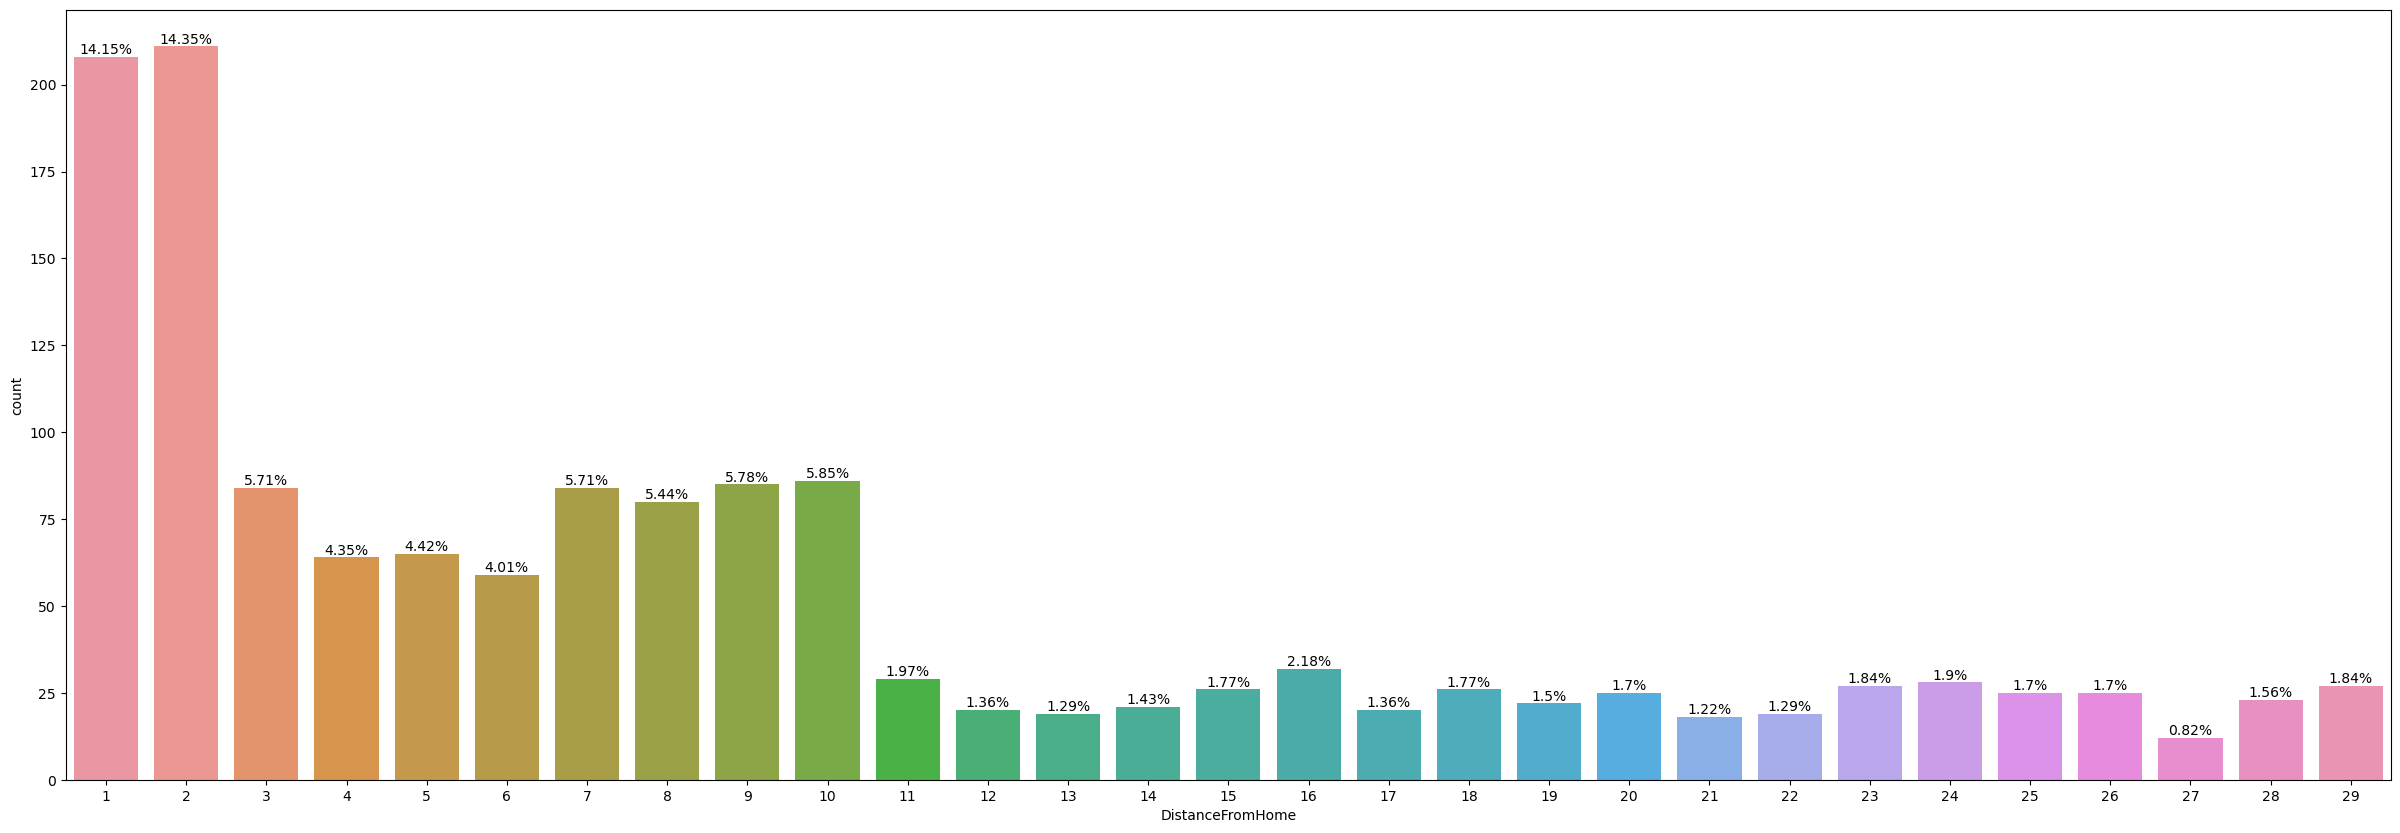

In [22]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["DistanceFromHome"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height()*100 /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width()/2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
    fig.set_figheight(10)                                                             # annotate: used to annotate over objects, here objects are the bars
    fig.set_figwidth(30)
plt.show()

In [23]:
info_of_cat('EducationField')

Unique values in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' nan 'Technical Degree'
 'Human Resources']
Mode of EducationField is Life Sciences
Number of missing values in EducationField is 12


In [24]:
nmode = df.EducationField.mode()[0]
print(nmode)
df["EducationField"].fillna(nmode, inplace = True)

Life Sciences


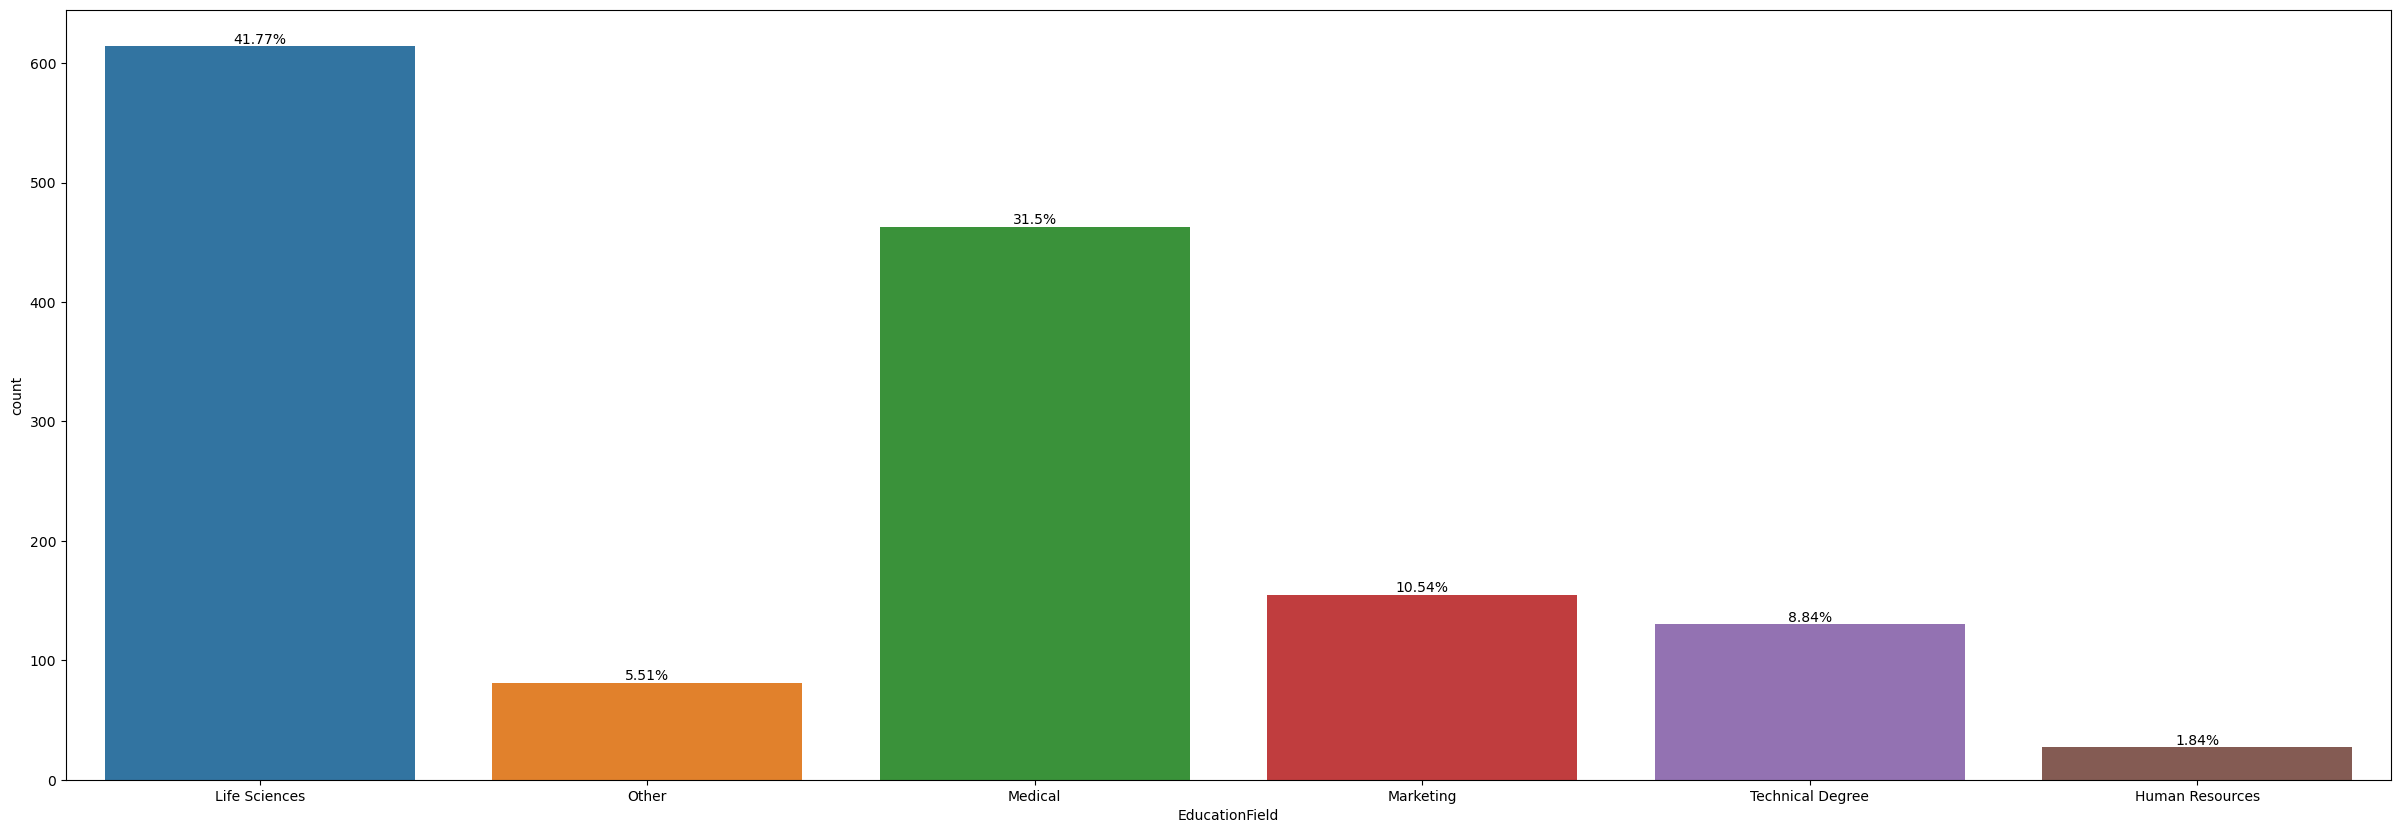

In [25]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["EducationField"])
for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib
    percentage = f"{round(bar.get_height()*100 /len(df), 2)}%"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width()/2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )   # va bottom: means percentage would be above the bar head. 
    fig.set_figheight(10)                                                             # annotate: used to annotate over objects, here objects are the bars
    fig.set_figwidth(30)
plt.show()

In [26]:
info_of_cat('WorkLifeBalance')

Unique values in WorkLifeBalance are: [1 3 2 4]
Mode of WorkLifeBalance is 3
Number of missing values in WorkLifeBalance is 0


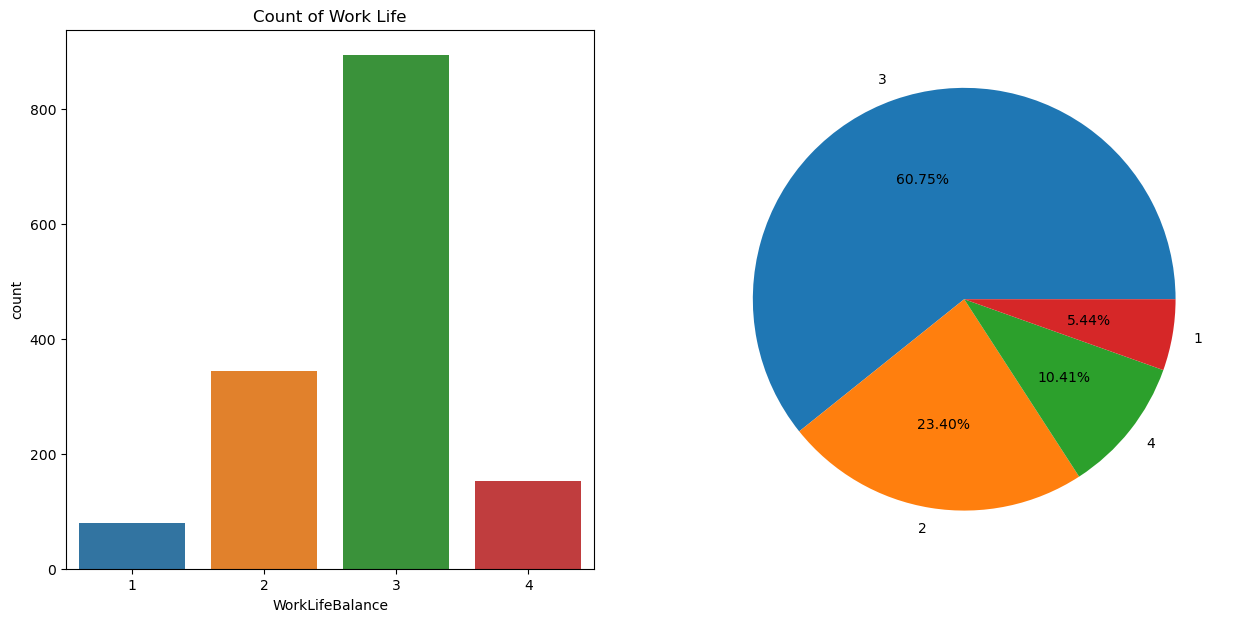

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Work Life")                  # Set the title of the graph
percentage = df["WorkLifeBalance"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["WorkLifeBalance"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["WorkLifeBalance"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [28]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [29]:
info_of_numerical('MonthlyIncome')

The mean of the MonthlyIncome is 6502.931292517007
The median of the MonthlyIncome is 4919.0
The mode of the MonthlyIncome is 2342
The standard deviation of the MonthlyIncome is 4707.956783097995
Number of missing values in the MonthlyIncome is 0


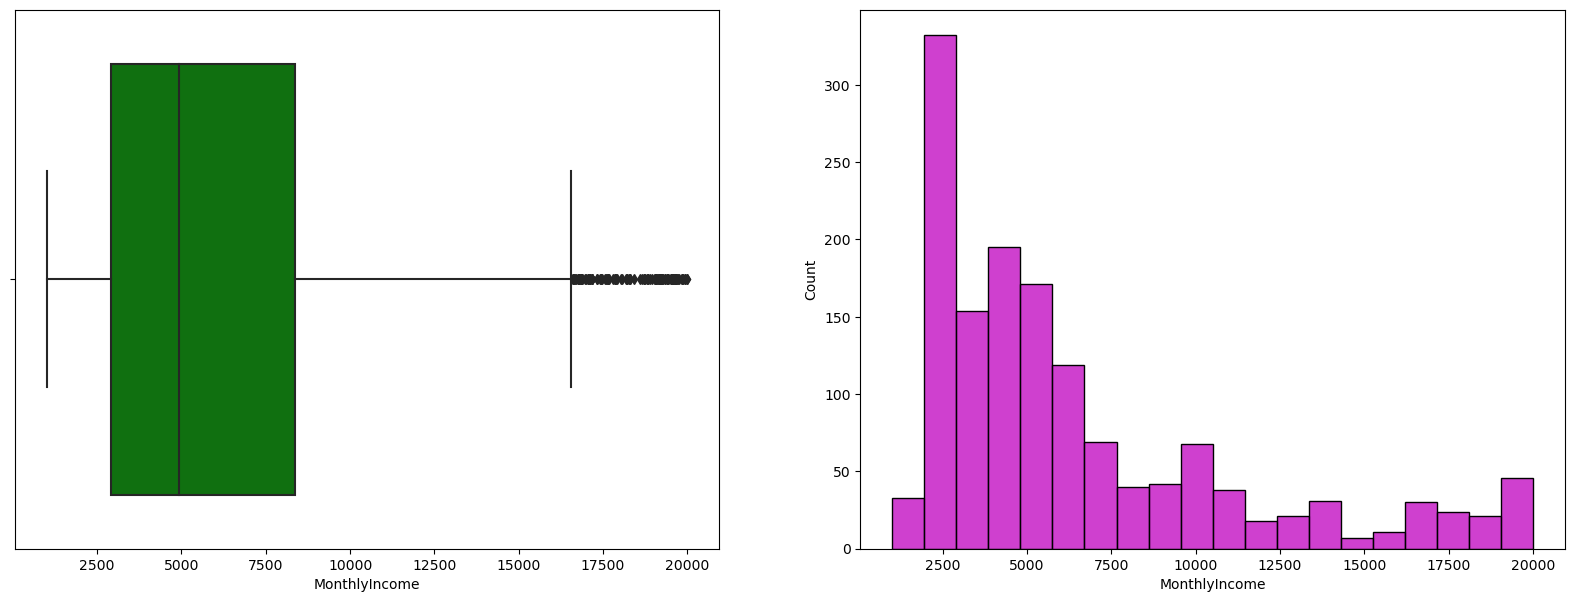

In [30]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["MonthlyIncome"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["MonthlyIncome"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [31]:
mean = int(df.MonthlyIncome.mean())
# accessing the data higher than 6
x = df[df["MonthlyIncome"] > 11000].index
for index in x:
    df.loc[index, "MonthlyIncome"] = mean

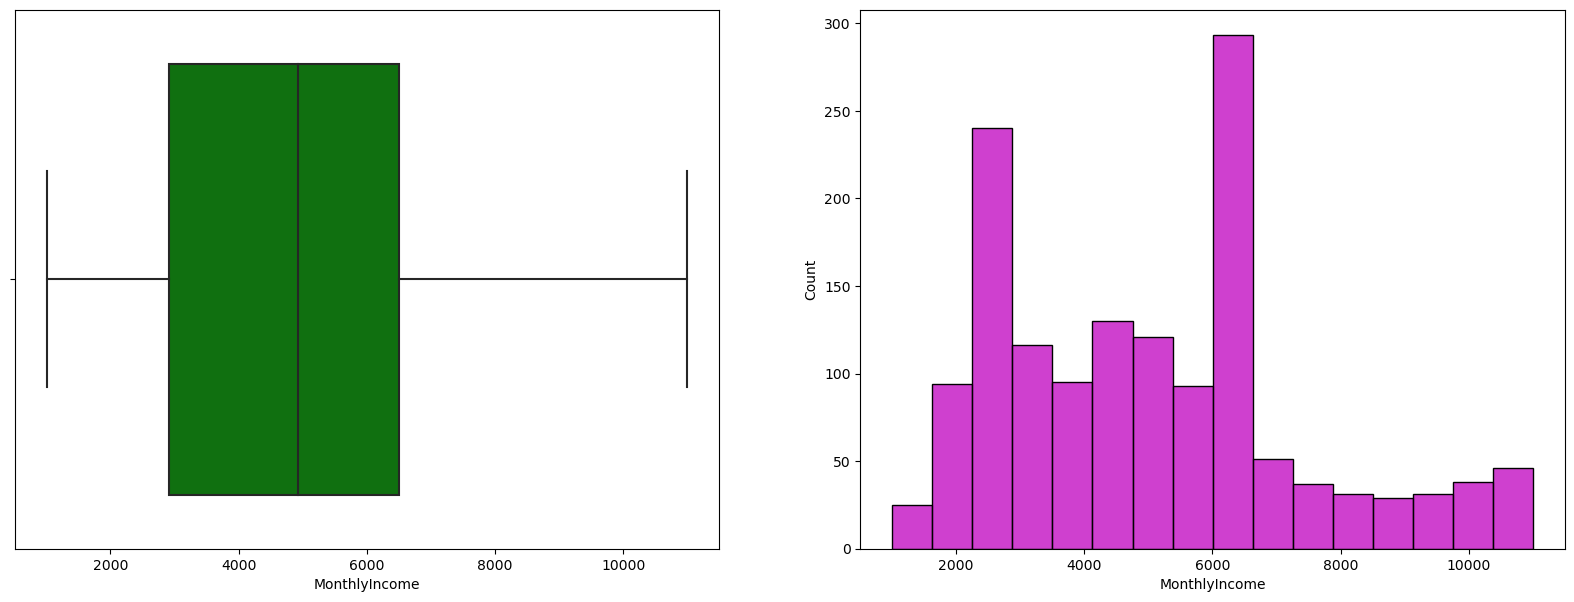

In [32]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["MonthlyIncome"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["MonthlyIncome"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [33]:
info_of_numerical('HourlyRate')

The mean of the HourlyRate is 65.89115646258503
The median of the HourlyRate is 66.0
The mode of the HourlyRate is 66
The standard deviation of the HourlyRate is 20.329427593996158
Number of missing values in the HourlyRate is 0


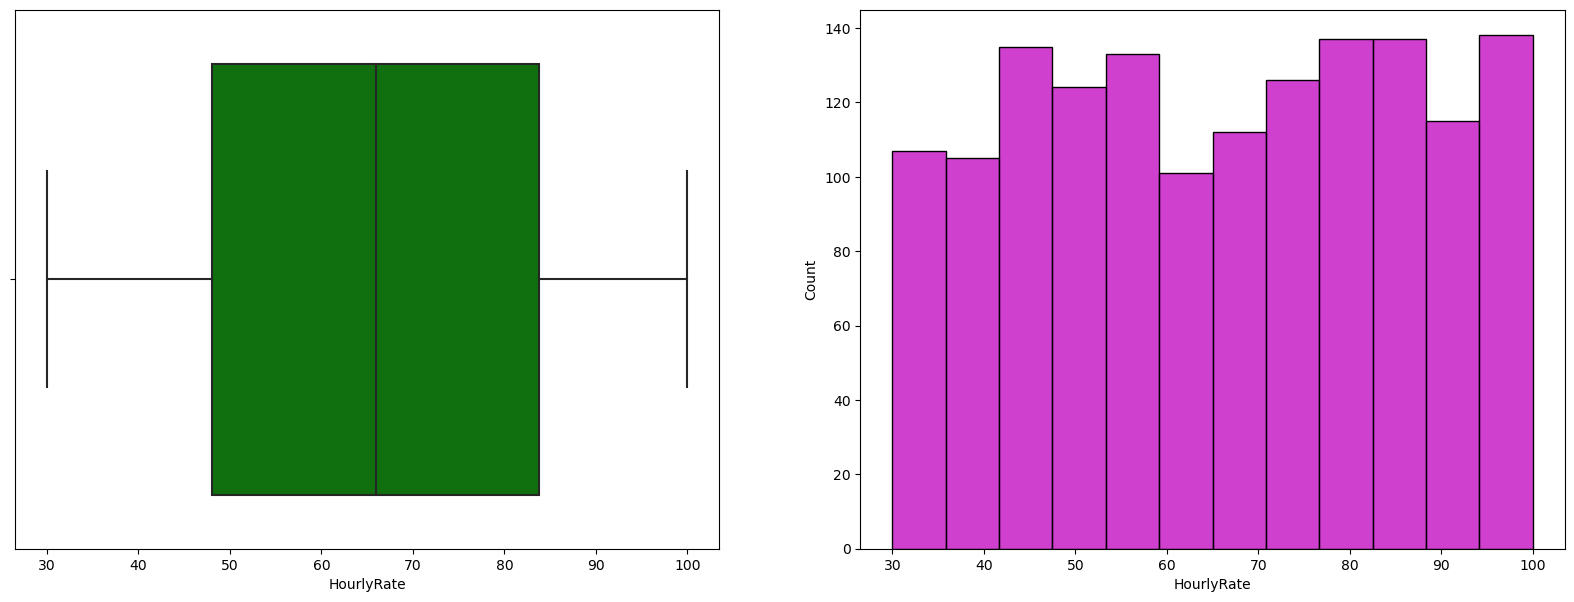

In [34]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["HourlyRate"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["HourlyRate"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [35]:
info_of_numerical("TotalWorkingYears")

The mean of the TotalWorkingYears is 11.279591836734694
The median of the TotalWorkingYears is 10.0
The mode of the TotalWorkingYears is 10
The standard deviation of the TotalWorkingYears is 7.780781675515004
Number of missing values in the TotalWorkingYears is 0


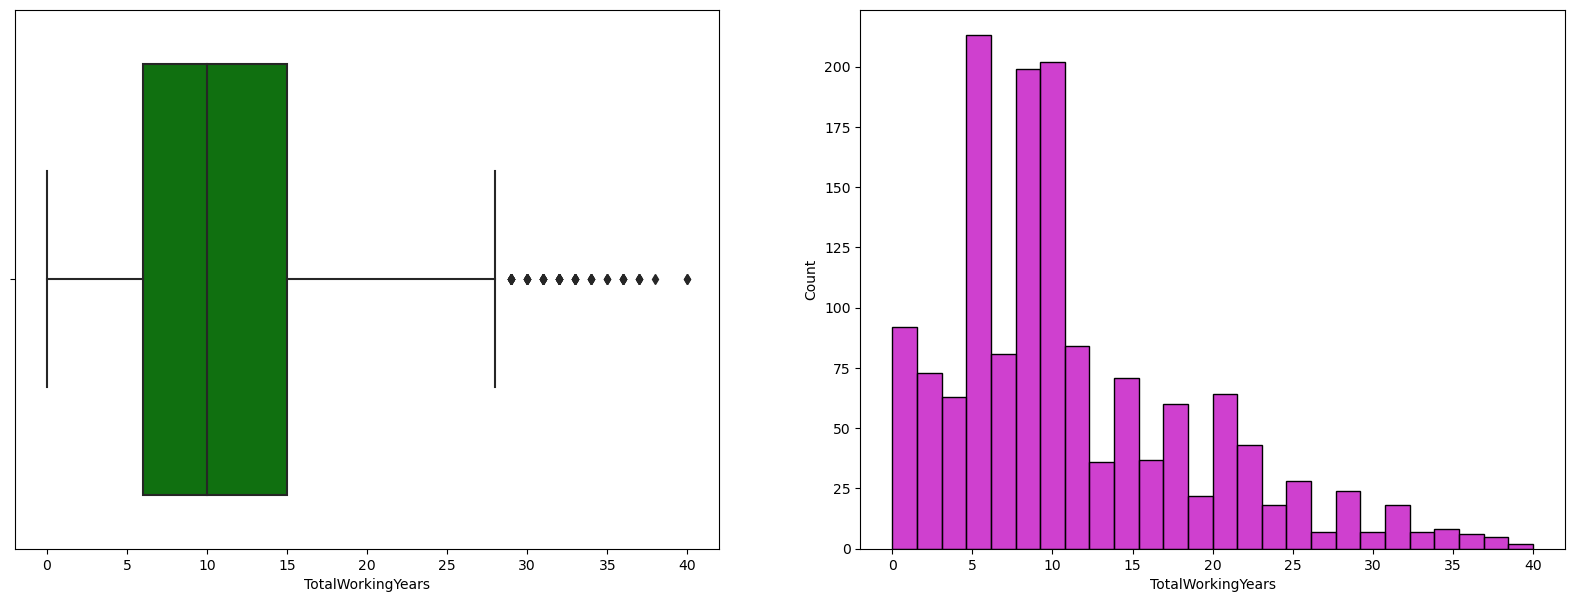

In [36]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["TotalWorkingYears"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["TotalWorkingYears"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [37]:
mean = int(df.TotalWorkingYears.mean())
# accessing the data higher than 6
x = df[df["TotalWorkingYears"] > 28].index
for index in x:
    df.loc[index, "TotalWorkingYears"] = mean

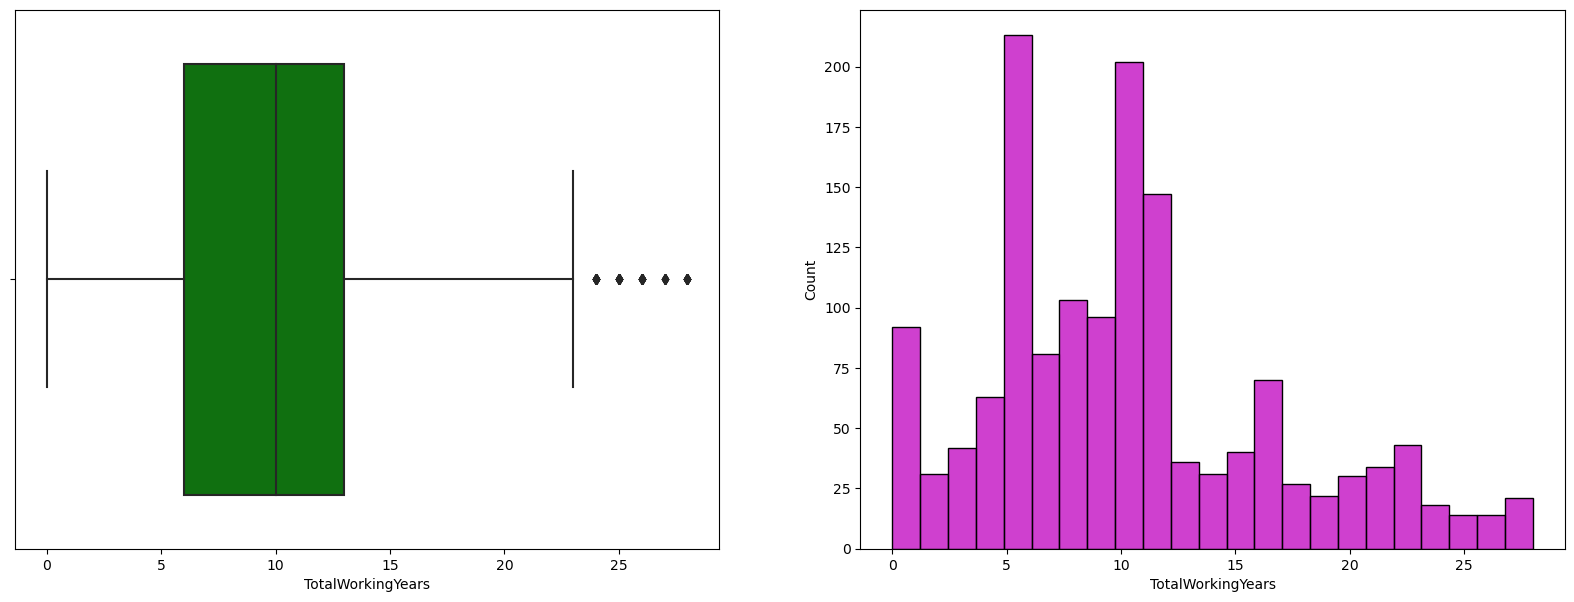

In [38]:
# Distribution of Customer_Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["TotalWorkingYears"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["TotalWorkingYears"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

# Level 2

In [39]:
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  -----------------
Attrition                 Age
BusinessTravel            EmployeeNumber
Department                HourlyRate
DistanceFromHome          MonthlyIncome
EducationField            TotalWorkingYears
EnvironmentSatisfaction   YearsAtCompany
Gender
JobInvolvement
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TrainingTimesLastYear
WorkLifeBalance
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


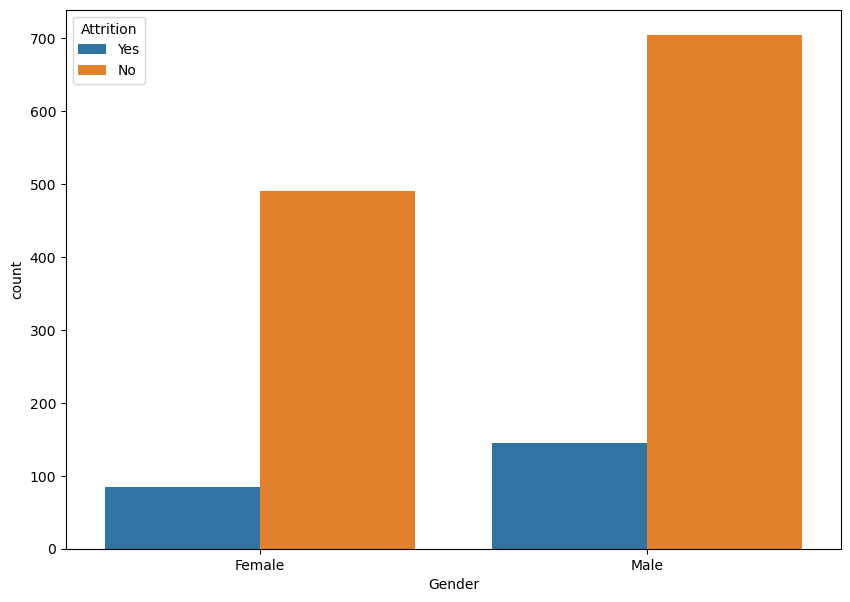

In [40]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Gender", hue = "Attrition", data = df)
plt.show()

# ** Percentsge of men getting Churn out more than Women

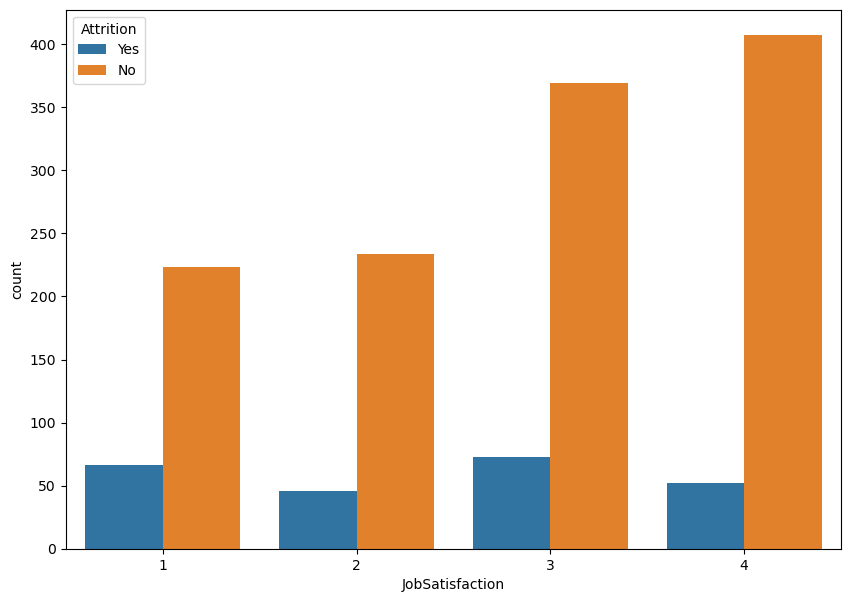

In [41]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "JobSatisfaction", hue = "Attrition", data = df)
plt.show()

# **Interpretation: Employees atritted more at rating 1

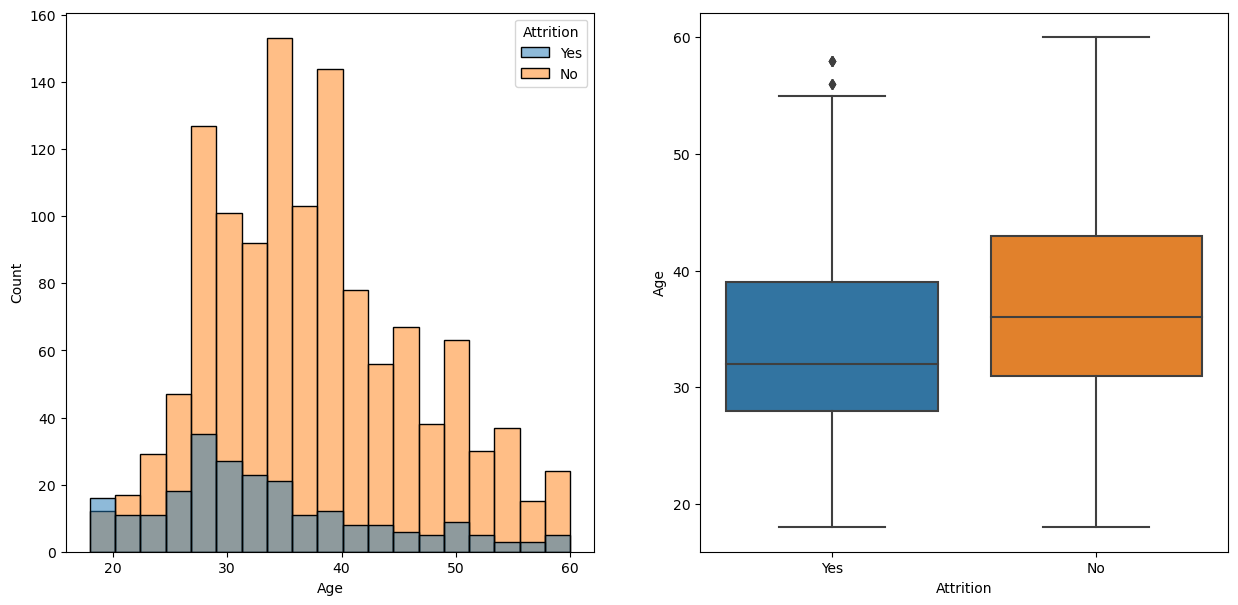

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Age"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["Age"], x = df["Attrition"], ax = ax[1])
plt.show()


# **Interpretation : Age below 26 Have more churn

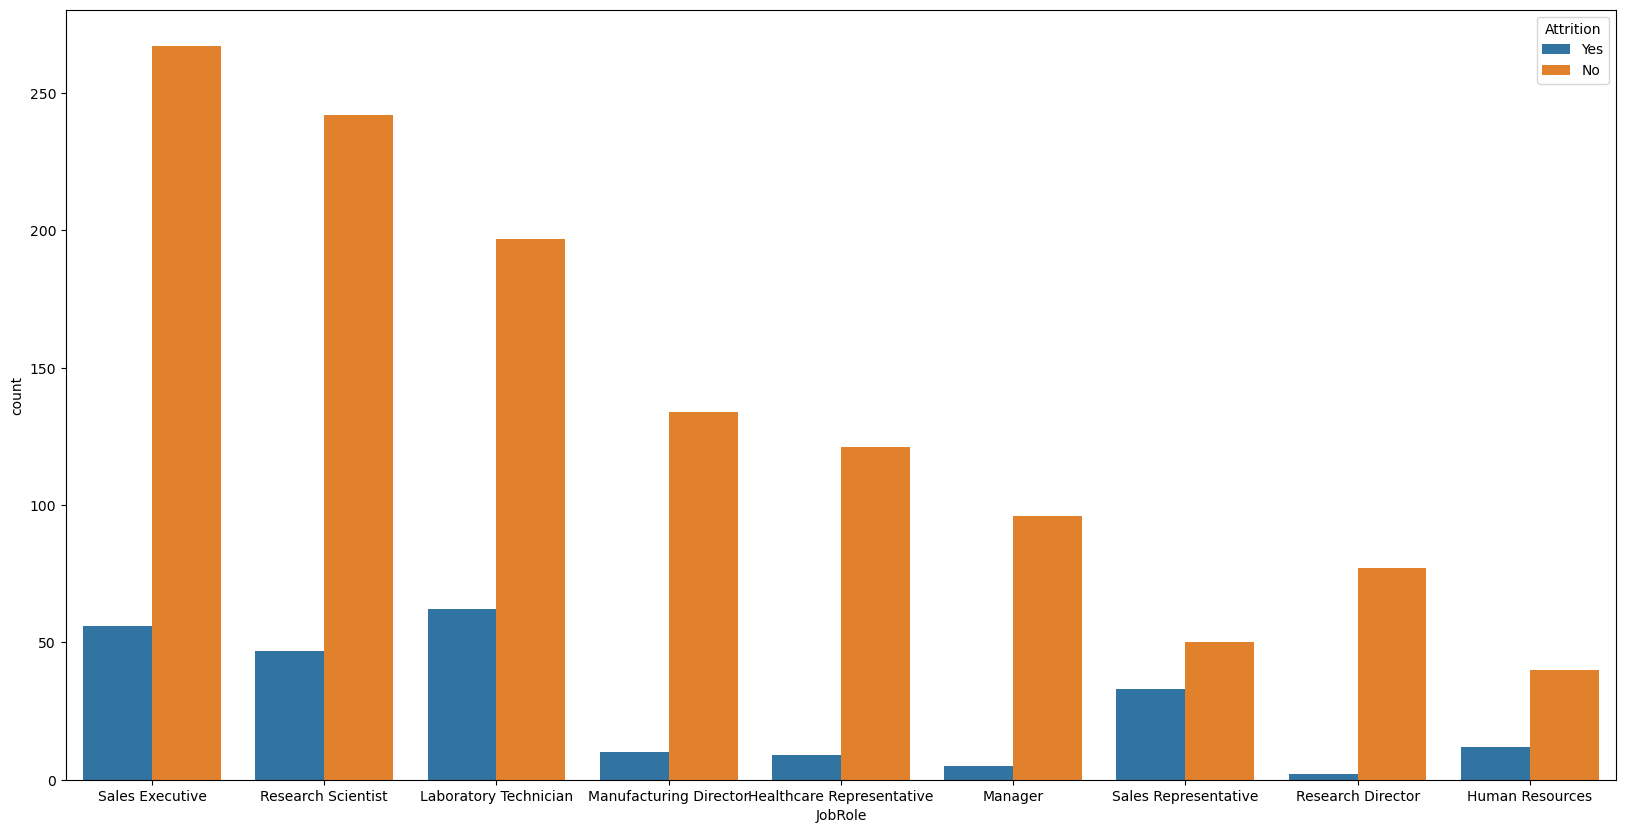

In [43]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.countplot(x = "JobRole", hue = "Attrition", data = df)
plt.show()

# **Interpretation : Sales represantative have more churn than other roles comepare to churn ratio

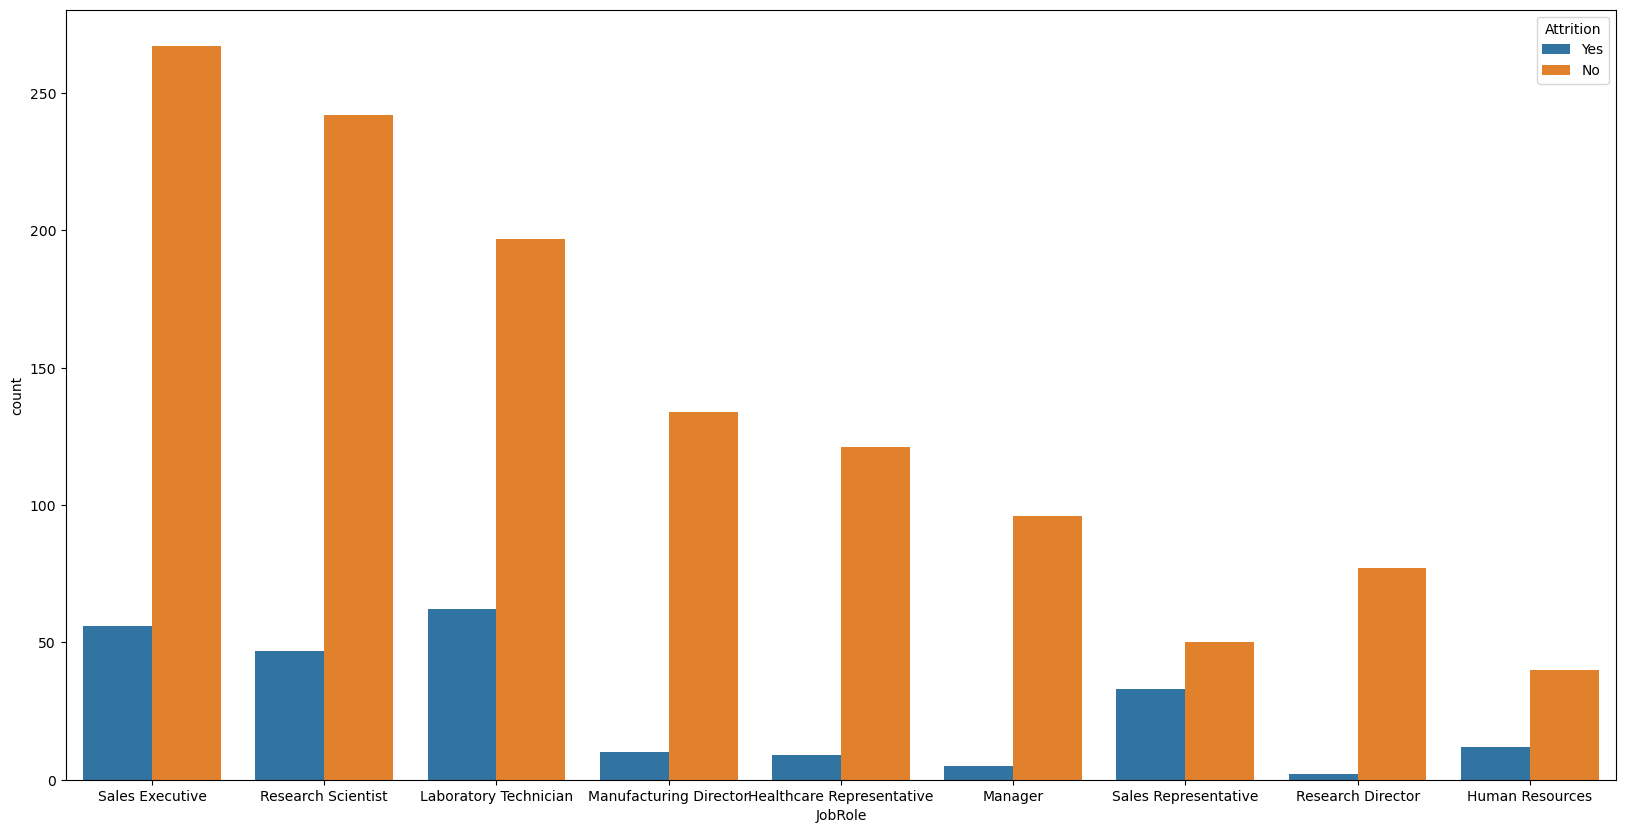

In [44]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.countplot(x = "JobRole", hue = "Attrition", data = df)
plt.show()

# **Interpretation: Sales Represantative and Laboratory Technician have most churn count than others
    and also 

C:\Users\bhush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


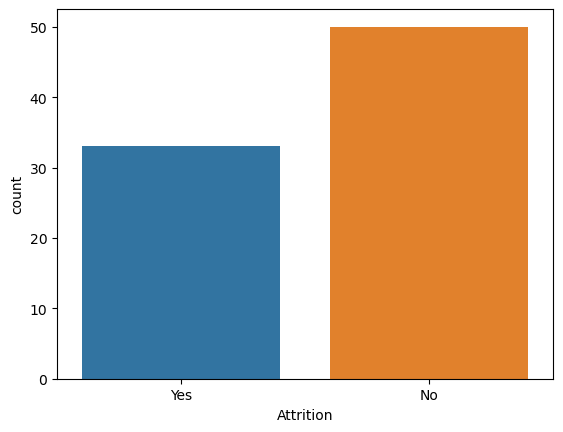

In [45]:
x = df[df["JobRole"]=='Sales Representative']
sns.countplot(x['Attrition']);

# **Interpretation :  In Job role of Sales Representative attrited enployees are about 72%

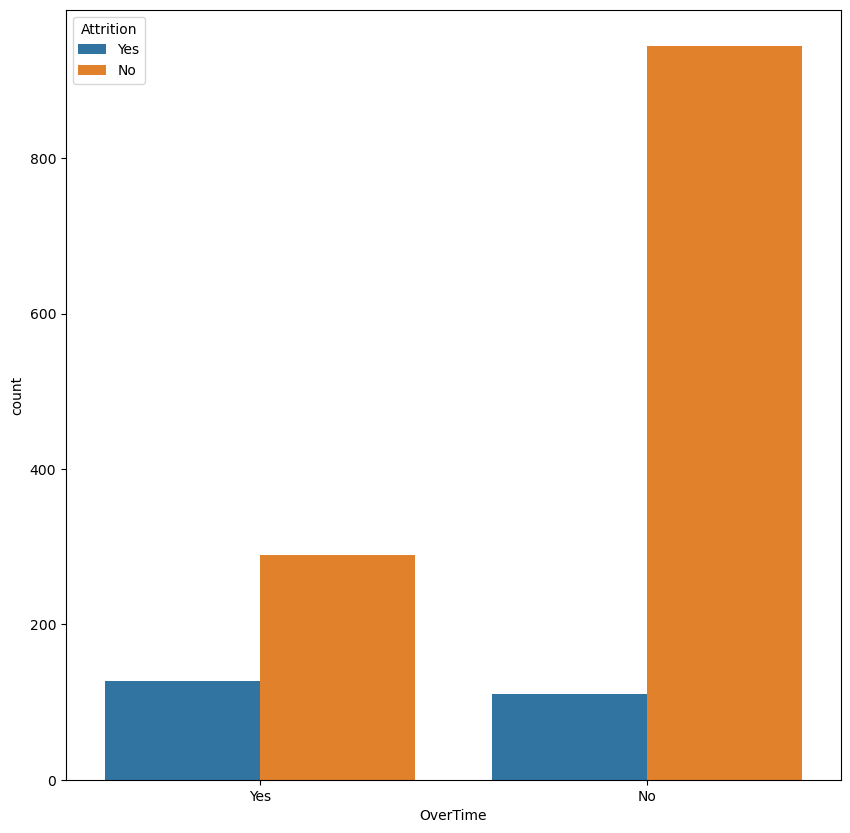

In [46]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.countplot(x = "OverTime", hue = "Attrition", data = df)
plt.show()

C:\Users\bhush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


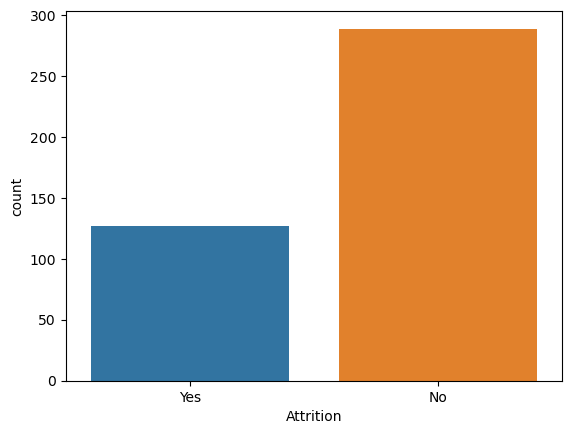

In [47]:
x = df[df["OverTime"]=='Yes']
sns.countplot(x['Attrition']);

# **Interpretation : Employees Worked Overtime Have more churn

# CAT NUM ANALYSIS: Categorical to continuous

In [48]:
continuous

['Age',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsAtCompany']

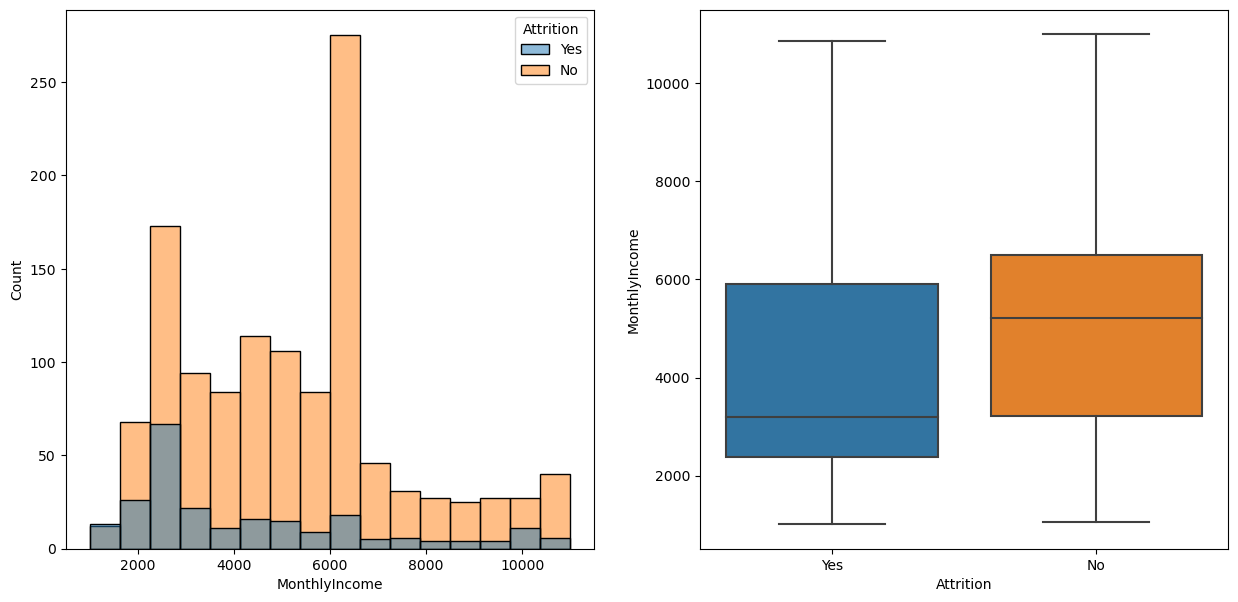

In [49]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["MonthlyIncome"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["MonthlyIncome"], x = df["Attrition"], ax = ax[1])
plt.show()


# **Interpretation : Here Monthly Income Below 30,000 are More Churn than usual

## Relationship of Hourly Rate and Attrition

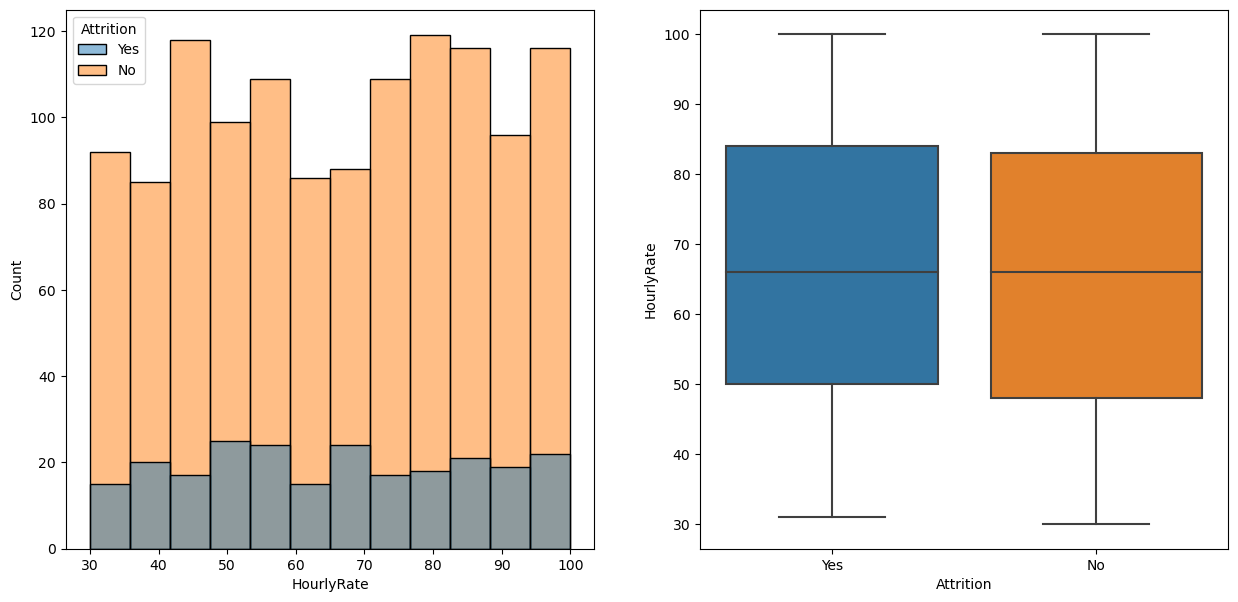

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["HourlyRate"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["HourlyRate"], x = df["Attrition"], ax = ax[1])
plt.show()

# Relationship in Tolal working years and Attrition

# Outliers Analysis and Treatment:

In [51]:
meand= int(df.TotalWorkingYears.mean())
# accessing the data higher than 6
x = df[df["TotalWorkingYears"] > 20].index
for index in x:
    df.loc[index, "TotalWorkingYears"] = meand

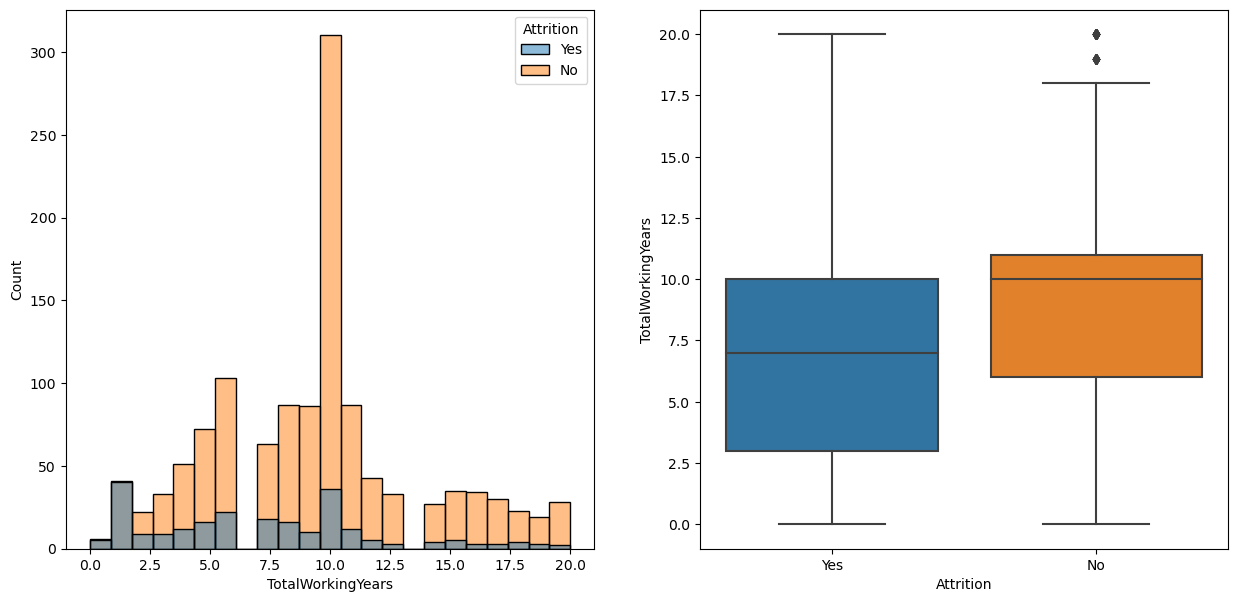

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["TotalWorkingYears"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["TotalWorkingYears"], x = df["Attrition"], ax = ax[1])
plt.show()

# **Interpretation : Employees with total working years less than 1 year have 90% of Churn

# Relationship in YearsAtCompany and Attrition

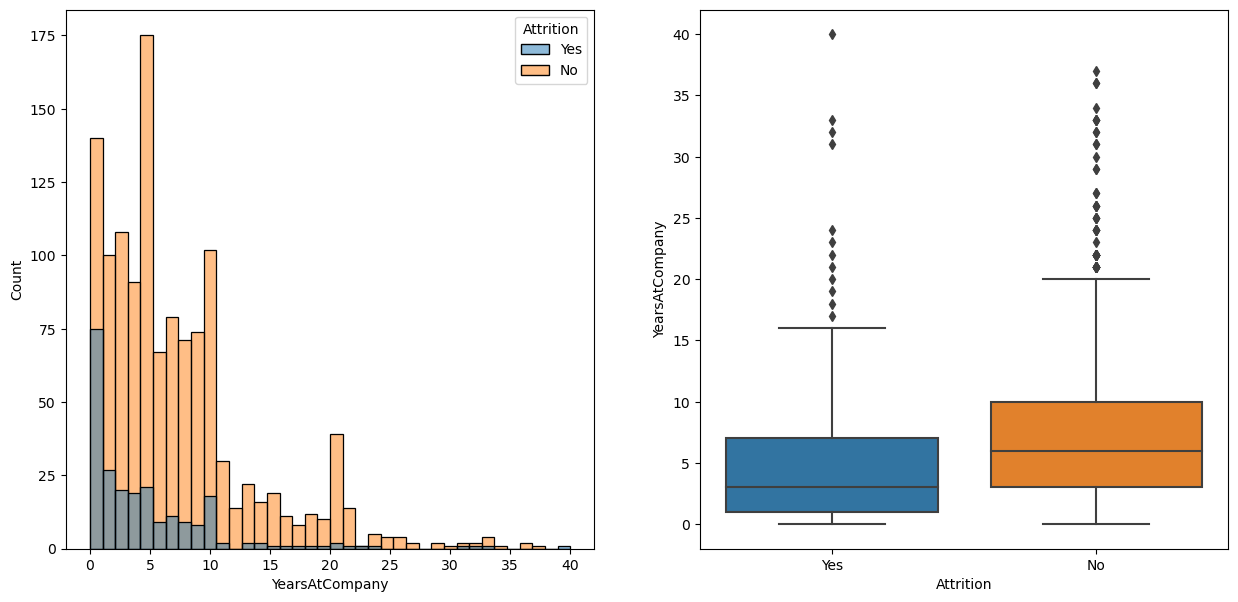

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["YearsAtCompany"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["YearsAtCompany"], x = df["Attrition"], ax = ax[1])
plt.show()

# Outliar Treatment:

In [56]:
meann = int(df.YearsAtCompany.mean())
x = df[df['YearsAtCompany']>17].index
for index in x:
    df.loc[index,"YearsAtCompany"] = meann

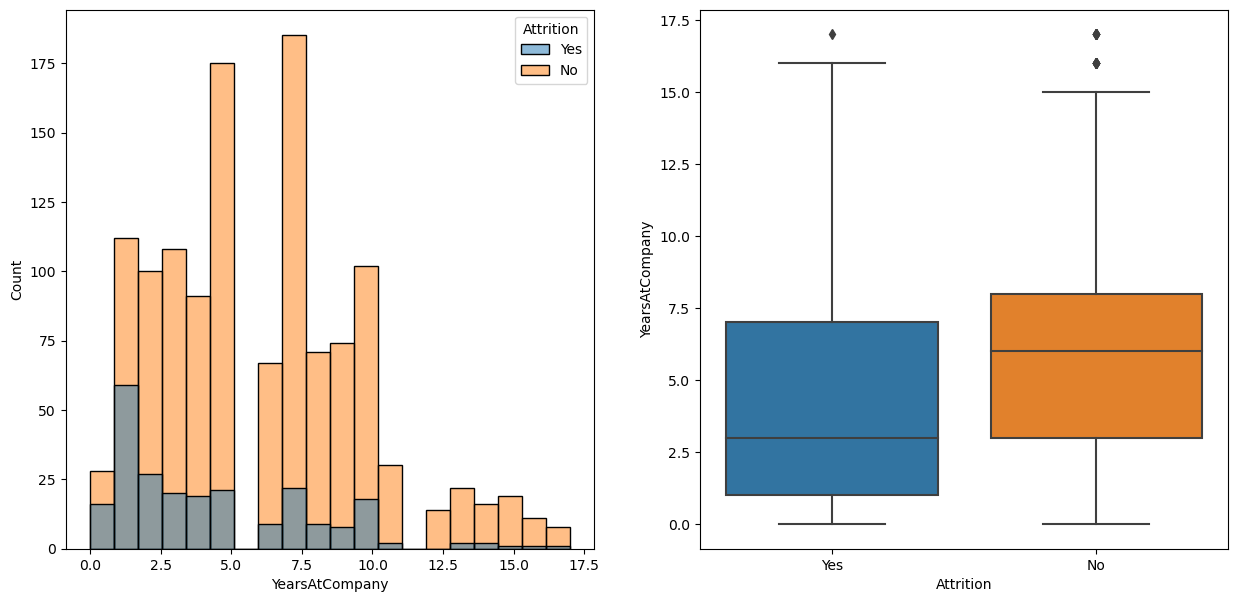

In [58]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["YearsAtCompany"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(y = df["YearsAtCompany"], x = df["Attrition"], ax = ax[1])
plt.show()

# **Interpretation : Employees with Years At company less than 2.5 year have more amount of Churn

# Level 3 analysis

# Which Group Of men have Larger churn Value

In [59]:
# Create age labels
males = df[(df["Gender"]=="Male") & (df["Attrition"]=="Yes")] # accessing the data using conditional statements where & is a bitwise operator 
bins =     [0,30, 40,   50, 60]                                             # Create the bins
labels =  ["Young", "Adult", "Senior", "Super-Seinor"]                   # setting the labels for the bins 
data = pd.cut(males["Age"], bins = bins, labels = labels)

data = data.value_counts()                                                      # value count is counting the number of values in the column
data

Adult           56
Young           55
Senior          21
Super-Seinor    13
Name: Age, dtype: int64

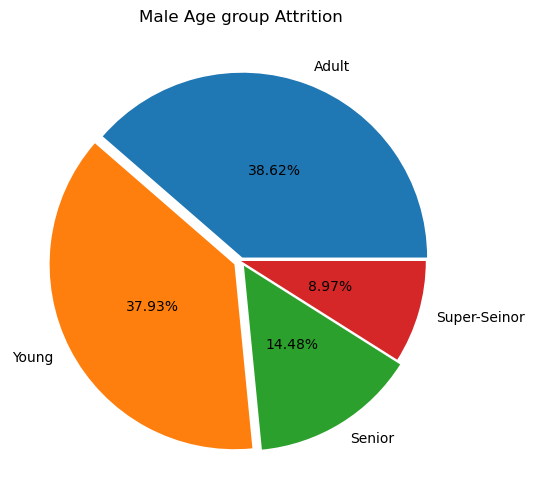

In [60]:
pie, ax = plt.subplots(figsize = [10,6])
plt.pie(x = data,explode = [0.02, 0.04, 0.03, 0] ,labels =data.index, pctdistance = 0.5, autopct= "%0.2f%%") #autopct is used to present the percentage, explode is used to seprate the pie
                                                                                            # pctdistance is the distance betweeen the percentage numbers on the pie
plt.title("Male Age group Attrition")
plt.show()

# **Interpretation: Young and Adult males age group have more churn than other

In [61]:
with_comp = df[(df["Gender"] == "Male") & (df["Attrition"] == "No")]
left_comp = df[(df["Gender"] == "Male") & (df["Attrition"] == "Yes")]
with_comp_mean = with_comp["MonthlyIncome"].mean()
left_comp_mean = left_comp["MonthlyIncome"].mean()

In [62]:
print(f"Men who are with the bank their average Monthly Income  is {round(with_comp_mean, 3)}")
print(f"Men who left the bank their average Monthly Income is {round(left_comp_mean,3)}")

Men who are with the bank their average Monthly Income  is 5205.259
Men who left the bank their average Monthly Income is 4398.545


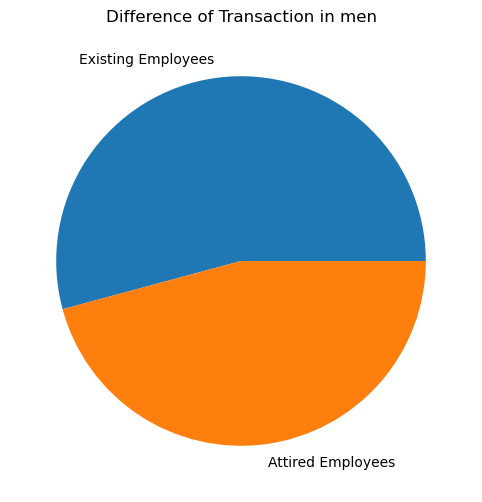

In [63]:
data = [5205, 4398]
fig, ax = plt.subplots(figsize = [10,6])
plt.pie(data, labels = ["Existing Employees", "Attired Employees"])
plt.title("Difference of Transaction in men")
plt.show()

# ***Interpretation: here is a difference in the Monthly Income made by the men who are with the Company compared to the women who left the company

In [64]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,Travel_Rarely,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8
